In [2]:
import pandas as pd

df = pd.read_csv("descriptions_output.csv")

# True if NaN or empty string
missing_mask = df['description'].isna() | (df['description'].str.strip() == "")

# Count missing per Source
missing_per_source = missing_mask.groupby(df['source']).sum()

print(missing_per_source)

source
bottom    20
middle     9
top       12
Name: description, dtype: int64


In [4]:
import pandas as pd

# Define temperature values to loop through
temps = [0.2, 0.5, 0.7]

for t in temps:
    # Build the file path dynamically
    path = f"Result_RQ2/{t}_RQ2_similarity.csv"

    # Load CSV
    df = pd.read_csv(path)

    # Group by Source and calculate mean similarity
    avg_sim_by_source = df.groupby("Source")["Mean_Cosine_Similarity"].mean()

    # Print results
    print(f"\nTemperature {t}")
    for tier, value in avg_sim_by_source.items():
        print(f"Avg_sim_{tier.capitalize()} = {value:.4f}")



Temperature 0.2
Avg_sim_Bottom = 0.5327
Avg_sim_Middle = 0.6039
Avg_sim_Top = 0.5843

Temperature 0.5
Avg_sim_Bottom = 0.5325
Avg_sim_Middle = 0.6026
Avg_sim_Top = 0.5825

Temperature 0.7
Avg_sim_Bottom = 0.5326
Avg_sim_Middle = 0.6033
Avg_sim_Top = 0.5828


In [6]:
import pandas as pd
from scipy.stats import kruskal

temps = [0.2, 0.5, 0.7]

for t in temps:
    path = f"Result_RQ2/{t}_RQ2_similarity.csv"
    df = pd.read_csv(path)

    # Extract per-tier similarity lists
    top_vals = df.loc[df["Source"].str.lower() == "top", "Mean_Cosine_Similarity"]
    mid_vals = df.loc[df["Source"].str.lower() == "middle", "Mean_Cosine_Similarity"]
    bot_vals = df.loc[df["Source"].str.lower() == "bottom", "Mean_Cosine_Similarity"]

    # Run Kruskal–Wallis test
    stat, p = kruskal(top_vals, mid_vals, bot_vals)

    # Print summary
    print(f"\nTemperature {t}")
    print(f"Kruskal–Wallis H-statistic = {stat:.4f}, p-value = {p:.4e}")

    # Interpret result
    if p < 0.05:
        print("➡️ Significant difference between at least two tiers")
    else:
        print("➡️ No significant difference between tiers")



Temperature 0.2
Kruskal–Wallis H-statistic = 29.4015, p-value = 4.1262e-07
➡️ Significant difference between at least two tiers

Temperature 0.5
Kruskal–Wallis H-statistic = 28.4397, p-value = 6.6741e-07
➡️ Significant difference between at least two tiers

Temperature 0.7
Kruskal–Wallis H-statistic = 29.0532, p-value = 4.9110e-07
➡️ Significant difference between at least two tiers


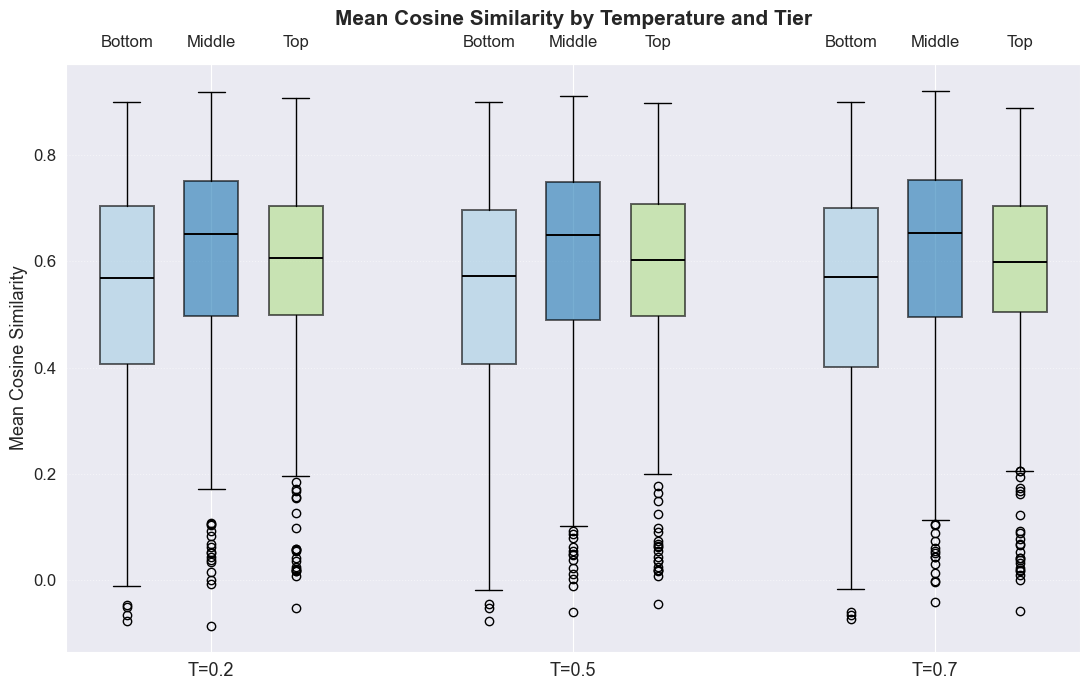

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Config ===
temps = [0.2, 0.5, 0.7]
tiers = ["Bottom", "Middle", "Top"]
data_dir = Path("Result_RQ2")
csv_tmpl = "{t}_RQ2_similarity.csv"

# === Load data ===
boxes = {}
for t in temps:
    df = pd.read_csv(data_dir / csv_tmpl.format(t=t))
    for tier in tiers:
        vals = df.loc[df["Source"].str.casefold() == tier.casefold(), "Mean_Cosine_Similarity"].dropna().tolist()
        boxes[(t, tier)] = vals

# === Plot layout ===
group_gap = 3.0
within_gap = 0.7
width = 0.45
colors = ["#a6cee3", "#1f78b4", "#b2df8a"]

fig, ax = plt.subplots(figsize=(11, 7))  # ⬅️ larger figure

# === Draw grouped boxplots ===
for tier_idx, tier in enumerate(tiers):
    pos = [i * group_gap + (tier_idx - 1) * within_gap for i in range(len(temps))]
    ax.boxplot(
        [boxes[(t, tier)] for t in temps],
        positions=pos,
        widths=width,
        patch_artist=True,
        boxprops=dict(facecolor=colors[tier_idx], alpha=0.6, linewidth=1.4),
        medianprops=dict(color="black", linewidth=1.4)
    )

# === X-axis: Temperature labels ===
group_centers = [i * group_gap for i in range(len(temps))]
ax.set_xticks(group_centers)
ax.set_xticklabels([f"T={t}" for t in temps], fontsize=13, fontweight='medium')

# === Top axis: Tier labels ===
tier_positions = []
tier_labels = []
for g in range(len(temps)):
    for tier_idx, tier in enumerate(tiers):
        tier_positions.append(group_centers[g] + (tier_idx - 1) * within_gap)
        tier_labels.append(tier)

ax_top = ax.secondary_xaxis('top')
ax_top.set_xticks(tier_positions)
ax_top.set_xticklabels(tier_labels, fontsize=12, fontweight='medium')
ax_top.tick_params(axis="x", length=0, pad=10)

# === Style ===
ax.set_ylabel("Mean Cosine Similarity", fontsize=13, fontweight='medium')
ax.set_title("Mean Cosine Similarity by Temperature and Tier", fontsize=15, fontweight='bold', pad=28)
ax.tick_params(axis="y", labelsize=12)
ax.grid(True, axis="y", linestyle=":", alpha=0.5)

plt.subplots_adjust(top=0.88, bottom=0.15)
plt.tight_layout()
plt.show()


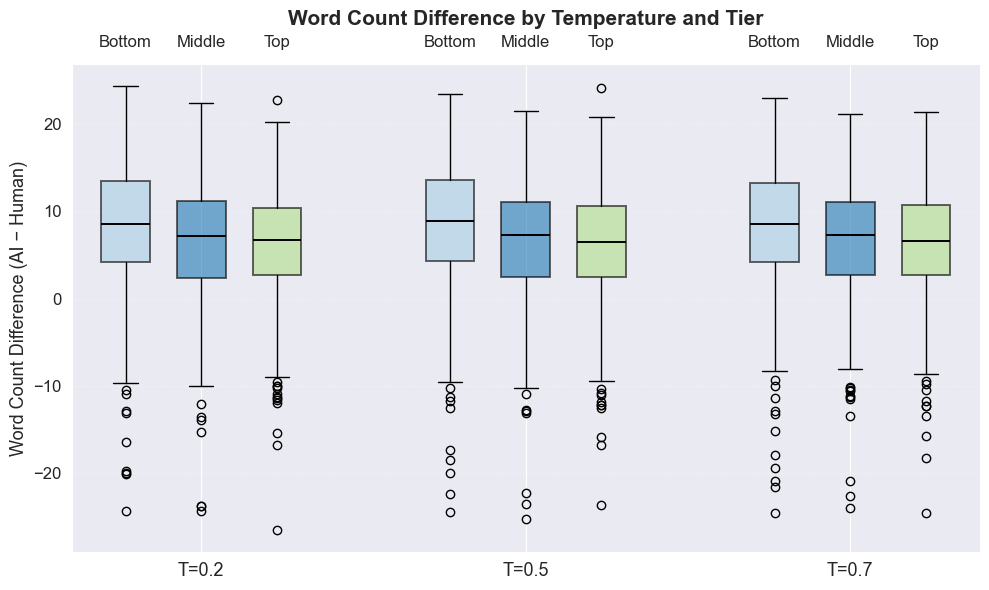

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Config ===
temps = [0.2, 0.5, 0.7]
tiers = ["Bottom", "Middle", "Top"]
data_dir = Path("Result_RQ2")
csv_tmpl = "{t}_compare_fog.csv"

# === Load data ===
values = {}
for t in temps:
    df = pd.read_csv(data_dir / csv_tmpl.format(t=t))
    for tier in tiers:
        vals = df.loc[df["Source"].str.casefold() == tier.casefold(), "fog_diff"].dropna().tolist()
        values[(t, tier)] = vals

# === Plot layout ===
group_gap = 3.0
within_gap = 0.7
width = 0.45
colors = ["#a6cee3", "#1f78b4", "#b2df8a"]

fig, ax = plt.subplots(figsize=(10, 6))

# Draw boxes for each tier group
for tier_idx, tier in enumerate(tiers):
    positions = [i * group_gap + (tier_idx - 1) * within_gap for i in range(len(temps))]
    ax.boxplot(
        [values[(t, tier)] for t in temps],
        positions=positions,
        widths=width,
        patch_artist=True,
        boxprops=dict(facecolor=colors[tier_idx], alpha=0.6, linewidth=1.4),
        medianprops=dict(color="black", linewidth=1.4)
    )

# === X-axis: Temperature labels ===
group_centers = [i * group_gap for i in range(len(temps))]
ax.set_xticks(group_centers)
ax.set_xticklabels([f"T={t}" for t in temps], fontsize=13, fontweight='medium')

# === Top tier labels ===
tier_positions = []
tier_labels = []
for g in range(len(temps)):
    for tier_idx, tier in enumerate(tiers):
        tier_positions.append(group_centers[g] + (tier_idx - 1) * within_gap)
        tier_labels.append(tier)

ax_top = ax.secondary_xaxis('top')
ax_top.set_xticks(tier_positions)
ax_top.set_xticklabels(tier_labels, fontsize=12, fontweight='medium')
ax_top.tick_params(axis="x", length=0, pad=10)

# === Style ===
ax.set_ylabel("Word Count Difference (AI − Human)", fontsize=13, fontweight='medium')
ax.set_title("Word Count Difference by Temperature and Tier", fontsize=15, fontweight='bold', pad=28)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True, axis="y", linestyle=":", alpha=0.5)

plt.subplots_adjust(top=0.88, bottom=0.15)
plt.tight_layout()
plt.show()
